In [118]:
# Librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [119]:
# Leemos el archivos csv
df = pd.read_csv('poblacion_bolivia.csv')
df

,label,Total de población
0,2021,12079472
1,2020,11936162
2,2019,11777315
3,2018,11606905
4,2017,11435533
...,...,...
57,1964,4029472
58,1963,3945729
59,1962,3864140
60,1961,3784744


In [120]:
lista_años = []
lista_poblacion = []

with open('poblacion_bolivia.csv', newline='') as archivo_csv:
    lector_csv = csv.reader(archivo_csv, delimiter=',')
    next(lector_csv)
    for fila in lector_csv:
        año = fila[0] # sacamos la columna label=año
        año_int = int(año) # convertinmos a enteros
        poblacion = fila[1] # sacamos la columna total poblacion
        poblacion_int = int(poblacion)
        lista_años.append(año_int)
        lista_poblacion.append(poblacion_int)

arr_años = np.array(lista_años)
arr_poblacion = np.array(lista_poblacion)


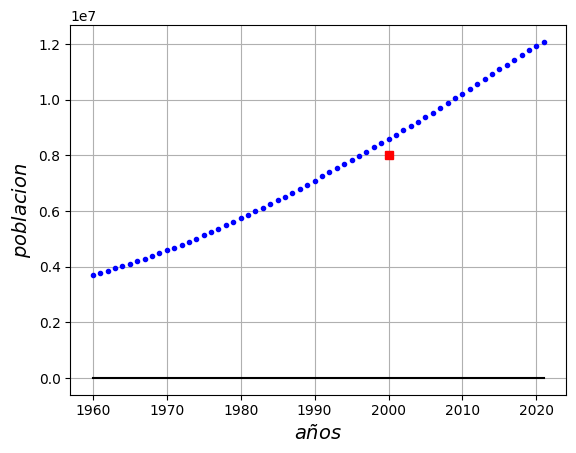

In [121]:
# Gráfica de personas vacunadas vs nuevos muertos de Colombia
#plt.scatter(x=arr_años, y=arr_poblacion)
plt.plot(arr_años, arr_poblacion, "b.")
plt.plot(arr_años, 2*arr_años, 'k')
plt.plot(2000, 2*4000000, 'sr')
plt.xlabel("$años$", fontsize=14)
plt.ylabel("$poblacion$", rotation=90, fontsize=14)
plt.grid(True)
plt.show()

In [122]:
def gradient(w, x, y): 
    # calculamos la derivada de la función de pérdida
    # con respecto a los parámteros `w`
    dldw = x*w - y
    dydw = x
    dldw = dldw*dydw
    return np.mean(2*dldw)

def costo(y_hat, y):
    # calculamos la función de pérdida
    costos = np.float64((y_hat - y)**2).mean()
    return costos


def entrenar(epochs, w, alpha):
    # iteramos un número determinado de `epochs`
    # por cada epoch, calculamos gradientes y
    # actualizamos los pesos
    weights = [(w, gradient(w, arr_años, arr_poblacion), costo(arr_años*w, arr_poblacion))]
    for i in range(epochs):
        dw = gradient(w, arr_años, arr_poblacion)
        w = w - alpha*dw
        weights.append((w, dw, costo(arr_años*w, arr_poblacion)))
    return weights

In [123]:
# establecemos valores iniciales
w_inicial = 100
numero_iteraciones = 30 
alpha = 0.002 # learning rate

weights = entrenar(numero_iteraciones, w_inicial, alpha)
weights


[(100, 72122111.77419356, -26783827.612903226),
 (-144144.22354838712, 72122111.77419356, 8.665830366103256e+16),
 (2343705152.8606153, -1171924648542.0818, 2.1765268594540513e+25),
 (-37144484706285.7, 1.857341420571928e+16, 5.466988265287547e+33),
 (5.886896404436123e+17, -2.9436339246415928e+20, 1.3731951233671872e+42),
 (-9.329931360499473e+21, 4.6652600250699584e+24, 3.449184002849223e+50),
 (1.4786674201712908e+26, -7.3938035974244785e+28, 8.66364151974185e+58),
 (-2.3434870579358372e+30, 1.1718174623389272e+33, 2.1761287400321963e+67),
 (3.714108741285834e+34, -1.8571715449958138e+37, 5.465988271101986e+75),
 (-5.886357978970981e+38, 2.9433646949225547e+41, 1.3729439453744103e+84),
 (9.32907802925546e+42, -4.664833332526679e+45, 3.4485530953402973e+92),
 (-1.478532178757353e+47, 7.393127347688228e+49, 8.66205680971045e+100),
 (2.3432727186605292e+51, -1.1717102859392024e+54, 2.175730693432958e+109),
 (-3.7137690426417453e+55, 1.8570016849568057e+58, 5.464988459830365e+117),
 (5.

In [124]:
# útlimo peso obtenido
w = weights[-1][0]
w=int(w)
w




9325665484679154022424862720075342577529325567789106102099670951399232100214279768876422463799804763440160121943449831630438400